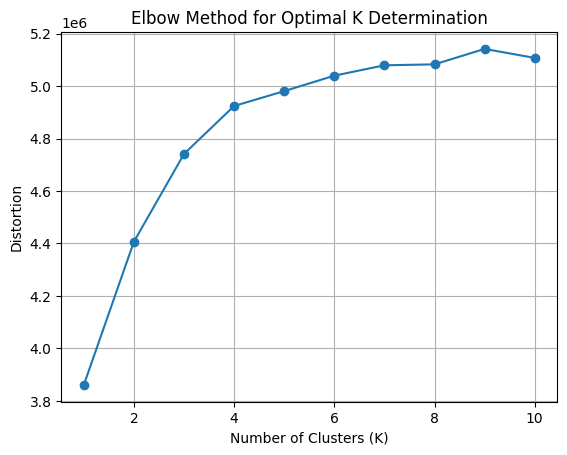

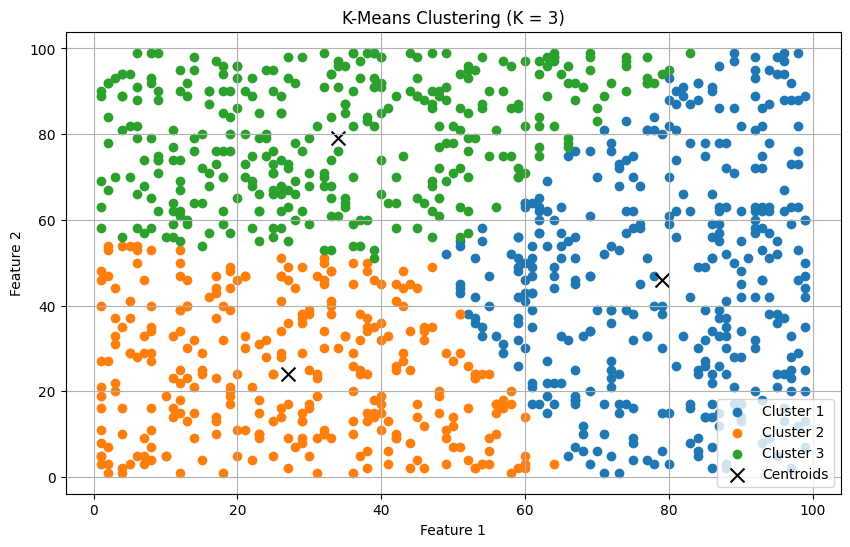

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random data points within the range of 1 to 100.
np.random.seed(42)
data_points = np.random.randint(1, 100, size=(1000, 2))

# Step 2: Implement K-Means clustering algorithm.
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def k_means_clustering(data, k, max_iterations=100):
    num_data_points = data.shape[0]
    num_features = data.shape[1]

    # Initialize centroids randomly from the data points.
    centroids = data[np.random.choice(num_data_points, k, replace=False)]

    # Array to store the cluster assignments for each data point.
    cluster_assignments = np.zeros(num_data_points)

    # Array to store the trajectory of centroids during iterations.
    centroid_trajectory = np.zeros((max_iterations + 1, k, num_features))
    centroid_trajectory[0] = centroids

    for iteration in range(max_iterations):
        # Assign each data point to the closest centroid.
        for i, point in enumerate(data):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_assignments[i] = np.argmin(distances)

        # Update centroids based on the mean of the data points in each cluster.
        for cluster_idx in range(k):
            cluster_points = data[cluster_assignments == cluster_idx]
            if len(cluster_points) > 0:
                centroids[cluster_idx] = np.mean(cluster_points, axis=0)

        centroid_trajectory[iteration + 1] = centroids

    return cluster_assignments, centroids, centroid_trajectory

# Step 3: Determine the optimal value of K using the elbow method.
def plot_elbow_method(data, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        _, _, centroid_trajectory = k_means_clustering(data, k)
        distortion = 0
        for i, centroids in enumerate(centroid_trajectory[1:], start=1):
            for point in data:
                distortion += euclidean_distance(point, centroids[int(i % k)])
        distortions.append(distortion)

    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal K Determination')
    plt.grid(True)
    plt.show()

# Step 4: Perform K-Means clustering using the optimal value of K.
def perform_k_means_clustering(data, k):
    cluster_assignments, centroids, centroid_trajectory = k_means_clustering(data, k)

    # Step 5: Visualize the trajectory of forming the clusters.
    plt.figure(figsize=(10, 6))
    for i in range(k):
        plt.scatter(data[cluster_assignments == i][:, 0], data[cluster_assignments == i][:, 1], label=f'Cluster {i+1}')

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-Means Clustering (K = {k})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Find the optimal value of K using the elbow method.
max_k = 10
plot_elbow_method(data_points, max_k)

# Perform K-Means clustering using the optimal value of K.
optimal_k = 3  # Replace this with the value obtained from the elbow method plot.
perform_k_means_clustering(data_points, optimal_k)
